# Cerium

In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vice
import paths

## GCE Models

In [2]:
from vice.yields.presets import JW20
from vice.yields.agb import cristallo11

# for now, use Sn Ia to specify NS merger contribution
vice.yields.sneia.settings['ce'] = 1e-8

print(vice.yields.ccsne.settings['fe'])
print(vice.yields.sneia.settings['ce'])
print(vice.yields.agb.settings['ce'])

0.0012
1e-08
cristallo11


In [3]:
output_dir = paths.data / 'onezone' / 'cerium'
output_dir.mkdir(parents=True, exist_ok=True)

In [4]:
dt = 0.01
tmax = 13.2
simtime = np.arange(0, tmax+dt, dt)

In [5]:
timescale = 15
def ifr(time):
    return m.exp(-time/timescale)

In [6]:
sz = vice.singlezone(
    name=str(output_dir / 'test'),
    func=ifr,
    mode='ifr',
    elements=('fe', 'o', 'ce'),
    eta=2.1,
    # Zin=Zin,
    delay=0.04,
    RIa='plaw',
    Mg0=0,
    tau_star=3,
    dt=dt,
    bins=[i*0.01 - 3 for i in range(401)],
)
sz.run(simtime, overwrite=True)

/opt/anaconda3/envs/twoinfall/lib/python3.12/site-packages/vice/core/singlezone/singlezone.py:1797: ScienceWarning: The following elements tracked by this simulation believed to be enriched by the r-process: ce 
In its current version, VICE is not designed to model enrichment via the r-process. These elements will likely be under-abundant in the output.
  return self.__c_version.run(output_times, capture = capture,


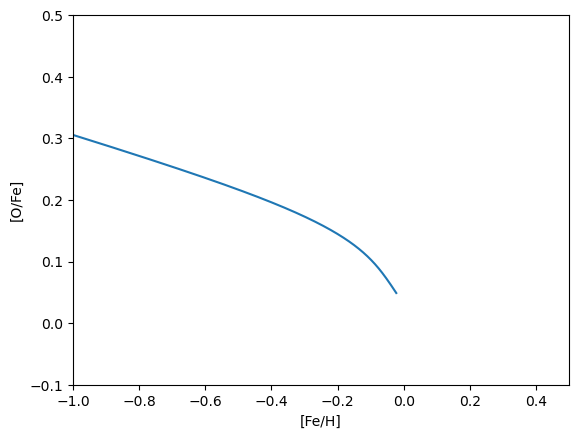

In [7]:
hist = vice.history(str(output_dir / 'test'))

fig, ax = plt.subplots()
ax.plot(hist['[fe/h]'], hist['[o/fe]'])
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_xlim((-1, 0.5))
ax.set_ylim((-0.1, 0.5))
plt.show()

In [8]:
hist

vice.dataframe{
    time -----------> [0, 0.01, 0.02, ... , 13.19, 13.2, 13.21]
    mgas -----------> [1e-12, 1e+07, 1.98932e+07, ... , 5.11072e+08, 5.10745e+08, 5.10417e+08]
    mstar ----------> [0, 3.0141e-15, 30141, ... , 1.81724e+09, 1.81814e+09, 1.81904e+09]
    sfr ------------> [3.33333e-22, 0.00333333, 0.00663107, ... , 0.170357, 0.170248, 0.170139]
    ifr ------------> [1, 0.999334, 0.998668, ... , 0.41506, 0.414783, 0.414506]
    ofr ------------> [7e-22, 0.007, 0.0139252, ... , 0.357751, 0.357521, 0.357292]
    eta_0 ----------> [2.1, 2.1, 2.1, ... , 2.1, 2.1, 2.1]
    r_eff ----------> [0.0957713, 0.0957713, 0.120232, ... , 0.47124, 0.471298, 0.471355]
    z_in(fe) -------> [0, 0, 0, ... , 0, 0, 0]
    z_in(o) --------> [0, 0, 0, ... , 0, 0, 0]
    z_in(ce) -------> [0, 0, 0, ... , 0, 0, 0]
    z_out(fe) ------> [0, 4e-06, 4.00128e-06, ... , 0.00122384, 0.00122404, 0.00122423]
    z_out(o) -------> [0, 5e-05, 5.0016e-05, ... , 0.0060746, 0.00607478, 0.00607496]
    z_out(

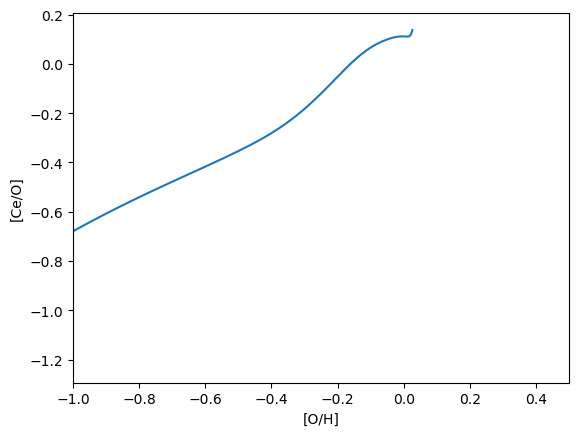

In [9]:
hist = vice.history(str(output_dir / 'test'))

fig, ax = plt.subplots()
ax.plot(hist['[o/h]'], hist['[ce/o]'])
ax.set_xlabel('[O/H]')
ax.set_ylabel('[Ce/O]')
ax.set_xlim((-1, 0.5))
# ax.set_ylim((-0.1, 0.5))
plt.show()